In [2]:
import openml
import pandas as pd
from sklearn import preprocessing, pipeline, ensemble
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
openml.config.apikey = '3e38f803ef7bc39dec173e1a37f313c3'

Download the OpenML dataset representation, 

# Attribute Information:
    LB - FHR baseline (beats per minute)
    AC - # of accelerations per second
    FM - # of fetal movements per second
    UC - # of uterine contractions per second
    DL - # of light decelerations per second
    DS - # of severe decelerations per second
    DP - # of prolongued decelerations per second
    ASTV - percentage of time with abnormal short term variability
    MSTV - mean value of short term variability
    ALTV - percentage of time with abnormal long term variability
    MLTV - mean value of long term variability
    Width - width of FHR histogram
    Min - minimum of FHR histogram
    Max - Maximum of FHR histogram
    Nmax - # of histogram peaks
    Nzeros - # of histogram zeros
    Mode - histogram mode
    Mean - histogram mean
    Median - histogram median
    Variance - histogram variance
    Tendency - histogram tendency
    CLASS - FHR pattern class code (1 to 10)
    NSP - fetal state class code (N=normal; S=suspect; P=pathologic)

# Get Classification Task  -  Supervised Classification on cardiotocography

In [4]:
task = openml.tasks.get_task(9979)

In [5]:
from pprint import pprint

In [6]:
pprint(vars(task))

{'class_labels': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
 'cost_matrix': None,
 'dataset_id': 1466,
 'estimation_parameters': {'number_folds': '10',
                           'number_repeats': '1',
                           'percentage': '',
                           'stratified_sampling': 'true'},
 'estimation_procedure': {'data_splits_url': 'https://www.openml.org/api_splits/get/9979/Task_9979_splits.arff',
                          'parameters': {'number_folds': '10',
                                         'number_repeats': '1',
                                         'percentage': '',
                                         'stratified_sampling': 'true'},
                          'type': 'crossvalidation'},
 'evaluation_measure': None,
 'split': None,
 'target_name': 'Class',
 'task_id': 9979,
 'task_type': 'Supervised Classification',
 'task_type_id': 1}


# Get dataset 

In [7]:
dataset = openml.datasets.get_dataset(1466)

# Create Data Frame

In [8]:
X, y, attribute_names = dataset.get_data(target=dataset.default_target_attribute, return_attribute_names=True)

In [9]:
data = pd.DataFrame(X, columns=attribute_names)

In [22]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35
0,23.0,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,45.0,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,45.0,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,45.0,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,45.0,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
data.shape

(2126, 35)

In [12]:
y

array([8, 5, 5, ..., 4, 4, 0])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 35 columns):
V1     2126 non-null float32
V2     2126 non-null float32
V3     2126 non-null float32
V4     2126 non-null float32
V5     2126 non-null float32
V6     2126 non-null float32
V7     2126 non-null float32
V8     2126 non-null float32
V9     2126 non-null float32
V10    2126 non-null float32
V11    2126 non-null float32
V12    2126 non-null float32
V13    2126 non-null float32
V14    2126 non-null float32
V15    2126 non-null float32
V16    2126 non-null float32
V17    2126 non-null float32
V18    2126 non-null float32
V19    2126 non-null float32
V20    2126 non-null float32
V21    2126 non-null float32
V22    2126 non-null float32
V23    2126 non-null float32
V24    2126 non-null float32
V25    2126 non-null float32
V26    2126 non-null float32
V27    2126 non-null float32
V28    2126 non-null float32
V29    2126 non-null float32
V30    2126 non-null float32
V31    2126 non-null fl

In [14]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,25.122766,878.439819,1702.877197,133.303864,133.303864,2.722484,7.241298,3.659925,46.990124,1.332785,...,0.180621,0.272342,0.024929,0.038100,0.033866,0.156162,0.118532,0.050329,0.032455,0.092662
std,15.241753,894.084717,930.919128,9.840844,9.840844,3.560850,37.125309,2.847094,17.192814,0.883241,...,0.384794,0.445270,0.155947,0.191482,0.180928,0.363094,0.323314,0.218675,0.177248,0.290027
min,1.000000,0.000000,287.000000,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,55.000000,1009.000000,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,538.000000,1241.000000,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,39.000000,1521.000000,2434.750000,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,48.000000,3296.000000,3599.000000,160.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
len(y)

2126

# Correlation

In [16]:
corr = data.corr()

In [21]:
corr[corr>0.0]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35
V1,1.000000,NaN,NaN,NaN,NaN,0.095095,NaN,NaN,NaN,0.008597,...,NaN,NaN,NaN,0.060958,NaN,0.080377,NaN,NaN,0.036846,0.043414
V2,NaN,1.000000,0.944912,NaN,NaN,NaN,NaN,0.225595,NaN,0.040505,...,0.050155,NaN,0.021245,NaN,NaN,0.089531,0.069631,0.087735,NaN,NaN
V3,NaN,0.944912,1.000000,NaN,NaN,0.071572,NaN,0.386856,NaN,0.044605,...,0.021596,0.018013,NaN,NaN,NaN,0.138695,0.043638,0.092371,NaN,NaN
V4,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.305570,NaN,...,NaN,NaN,NaN,0.005591,0.158350,NaN,NaN,NaN,0.069885,0.283783
V5,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.305570,NaN,...,NaN,NaN,NaN,0.005591,0.158350,NaN,NaN,NaN,0.069885,0.283783
V6,0.095095,NaN,0.071572,NaN,NaN,1.000000,0.053956,0.212100,NaN,0.191378,...,NaN,0.467663,NaN,0.328854,NaN,0.264657,NaN,NaN,NaN,NaN
V7,NaN,NaN,NaN,NaN,NaN,0.053956,1.000000,NaN,NaN,0.138061,...,NaN,NaN,NaN,0.058019,NaN,0.113454,0.001145,0.089162,NaN,NaN
V8,NaN,0.225595,0.386856,NaN,NaN,0.212100,NaN,1.000000,NaN,0.232687,...,NaN,0.023350,NaN,NaN,NaN,0.243954,0.084710,0.113672,NaN,NaN
V9,NaN,NaN,NaN,0.305570,0.305570,NaN,NaN,NaN,1.000000,NaN,...,0.046221,NaN,NaN,NaN,0.072269,NaN,NaN,0.137192,0.308643,0.364282
V10,0.008597,0.040505,0.044605,NaN,NaN,0.191378,0.138061,0.232687,NaN,1.000000,...,NaN,NaN,0.021396,0.096120,NaN,0.284401,0.259776,0.275303,NaN,NaN


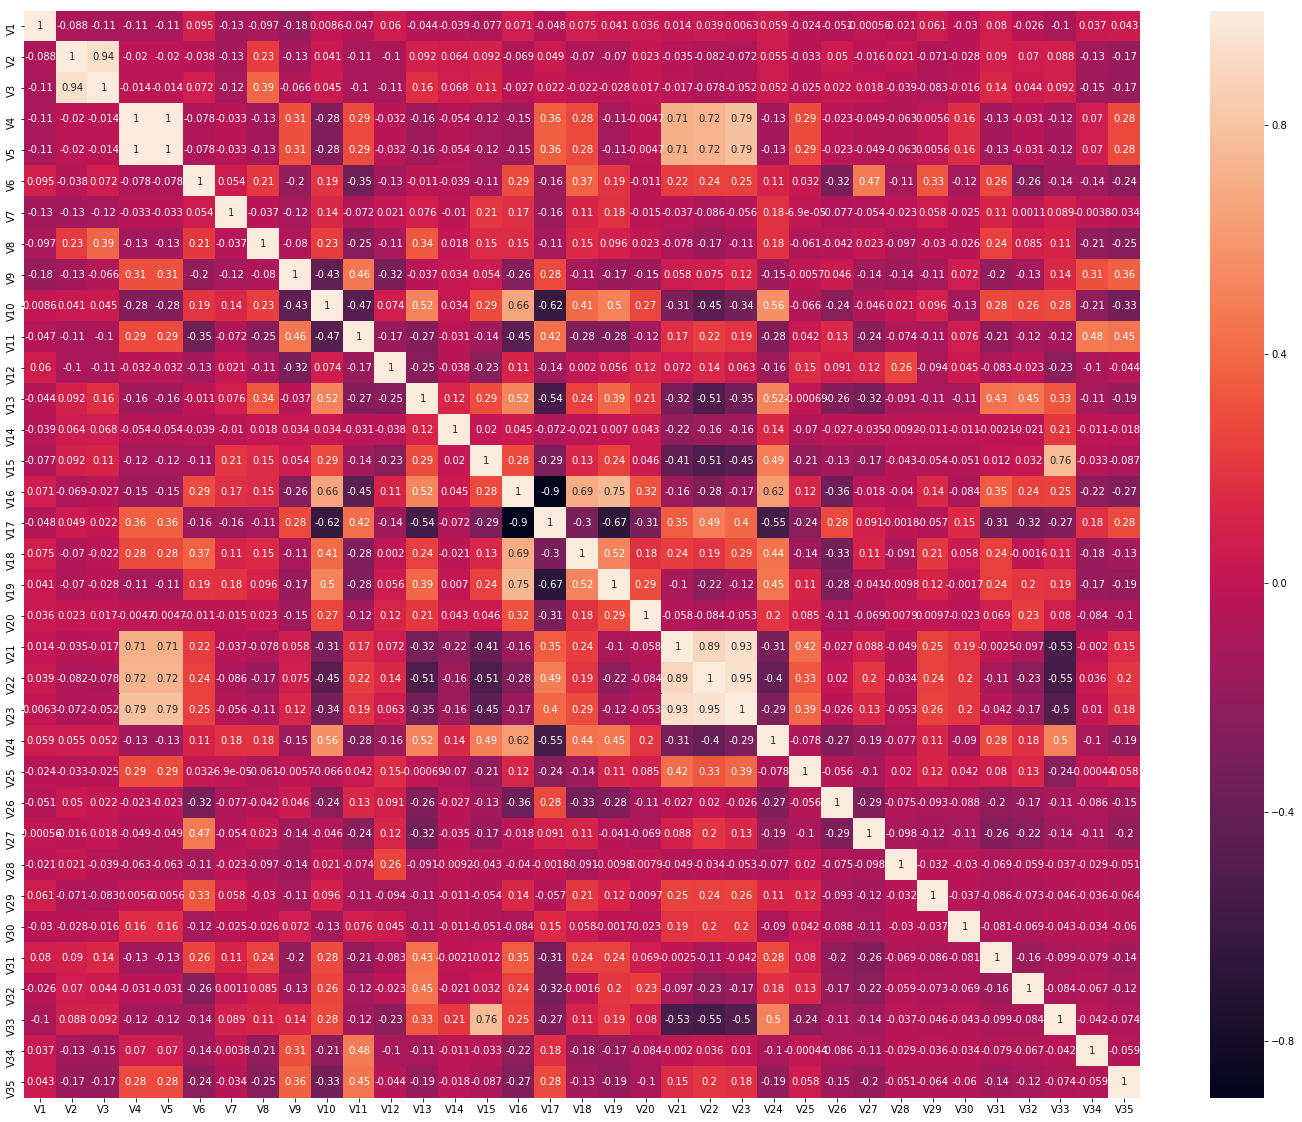

In [28]:
plt.figure(figsize = (25,20))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)

# TODO ->
    1. PCA ?
    2. StandardScaler ?
    3. Visualization dataset (seaborn?)
    4. Clf
    5. Visualization results (seaborn?)
    6. Prediction error 


# Pipeline

In [20]:
clf = ensemble.GradientBoostingClassifier()